# Comparison of ML Classification Models to Predict Bank Marketing Outcomes
                  

**DSE offline Bangalore June 2022**

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [212]:
df=pd.read_csv("bank-additional-full.csv",sep=";")

In [213]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [214]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [215]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("")
    print("")
    

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital
['married' 'single' 'divorced' 'unknown']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default
['no' 'unknown' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


duration
[ 261  149  226 ... 1246 1556 1868]


campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 4

In [216]:
numerical=df.select_dtypes(include=np.number)
categorical=df.select_dtypes(include="object")


In [217]:
categorical.drop(labels='y',axis=1,inplace=True)

In [218]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [220]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

### PDAYS

In [221]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

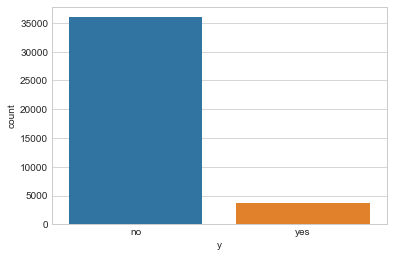

In [222]:
sns.countplot(x=df[df["pdays"]==999]["y"])

In [223]:
df[df["pdays"]==999].shape[0]/len(df)

0.9632174419733903

In [224]:
df[df["pdays"]==999]["y"].value_counts(normalize=True)

no     0.907418
yes    0.092582
Name: y, dtype: float64

In [225]:
#The feature pdays has more than 96% of the value as “999” which means that particular customer
#has not been contacted before.In that 95% yes/no is 10%/90% 

In [226]:
df["y"].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [227]:
df[df["pdays"]!=999]["y"].value_counts(normalize=True)

yes    0.638284
no     0.361716
Name: y, dtype: float64

In [228]:
#The other set of customers who have been contacted before also has yes/no at 64%/36%
#Which means there is inverse in trend in the small subset of 4% where the yes is
#having major share and no is having less share 


<AxesSubplot:xlabel='pdays', ylabel='Density'>

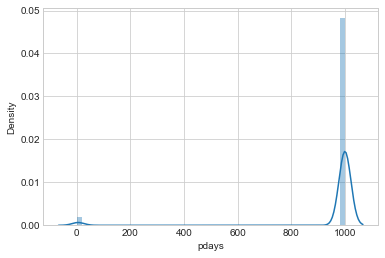

In [229]:
sns.distplot(df["pdays"])

In [230]:
#this feature can be discretized like not contacted before  and contacted before

### AGE


In [231]:
df.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Density'>

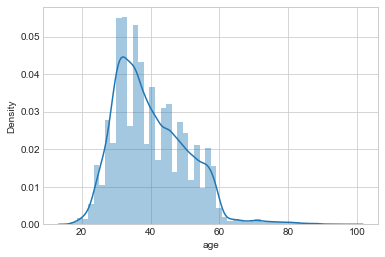

In [232]:
sns.distplot(df.age)

In [233]:
#Age is a continuous numerical variable and we need to put it into bins


In [234]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [235]:
# age is having a standard deviaiton of 10
# max value of 98 and min value of 17
# so we will make bins of 10 size starting 10 upto 100

In [236]:
df["agegroup"]=pd.cut(x=df.age,bins=[10,20,30,40,50,60,70,80,90,100])

In [237]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"


In [238]:
df.agegroup.value_counts(ascending=True)

(90, 100]       10
(80, 90]       109
(10, 20]       140
(70, 80]       303
(60, 70]       488
(50, 60]      6270
(20, 30]      7243
(40, 50]     10240
(30, 40]     16385
Name: agegroup, dtype: int64

In [239]:
# now after compartmentalization we can check the count with target as hue


<AxesSubplot:xlabel='agegroup', ylabel='count'>

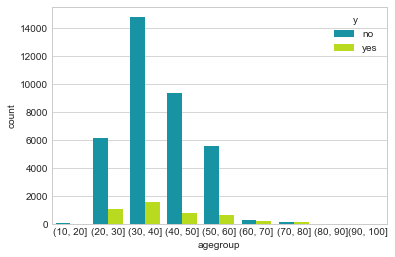

In [240]:
sns.countplot(x=df.agegroup,hue=df.y,palette="nipy_spectral")

In [241]:
# we can see a high segment are on 30 -60 and after 60 and below 30 there are not much people so 
#for more clarity we can re compartmentalize with less than 30 ,30-60,60+ 
# since 60+ are retired people or senior citizen the division makes some sense also

In [242]:
df["agegroup2"]=pd.cut(x=df.age,bins=[0,30,45,60,100])

<AxesSubplot:xlabel='agegroup2', ylabel='count'>

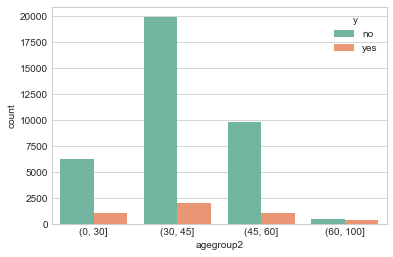

In [243]:
sns.countplot(x=df.agegroup2,hue=df.y,palette="Set2")

In [244]:
# ite seems that first and last groups have more percent of conversion into deposit we will find 
# that out numerically

In [245]:
# now we can analyze the success rate in the different age groups

In [246]:
df["agegroup2"]=df["agegroup2"].astype("string")

In [247]:
df.agegroup2.unique()[0]

'(45, 60]'

In [248]:
len(df[df["agegroup2"]=="(45, 60]"])

10921

In [249]:

for i in df.agegroup2.unique():
    no_of_people_contacted=len(df[df["agegroup2"]==i])
    success=df[df["agegroup2"]==i]["y"].value_counts(normalize=True)
    success_percentage=round(success[1]*100,2)
    print("clients contacted for the age group {} is {} and the success rate is {}%".format(i,no_of_people_contacted,success_percentage))

clients contacted for the age group (45, 60] is 10921 and the success rate is 9.56%
clients contacted for the age group (30, 45] is 21974 and the success rate is 9.37%
clients contacted for the age group (0, 30] is 7383 and the success rate is 15.22%
clients contacted for the age group (60, 100] is 910 and the success rate is 45.49%


In [250]:
# for the age group from 0 to 30 there is 15% success 
# for the age group from 60 onwards there is 45% success
# for those who are between 30 to 60 only 9% success is there
# this means there is a high chance of people who are really old and young has more tendency towards 
# savings than the working class

In [251]:
df["agegroup2"] = df["agegroup2"].astype(object)

### DURATION

In [252]:
# the duration of the call is said to be a great predictor on the target variable as said by 
# the dataset itself.we will try to see if thats true

<AxesSubplot:xlabel='y', ylabel='duration'>

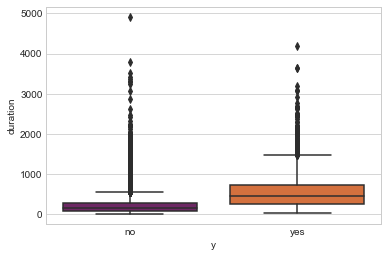

In [253]:
sns.boxplot(data=df,x="y",y="duration",palette="inferno")

In [254]:
# from the box plot we can see there is decent  seperation of classes 
# we can numerically find these using value counts
#before that we need to check the distribution of values of duration feature

<AxesSubplot:xlabel='duration', ylabel='Density'>

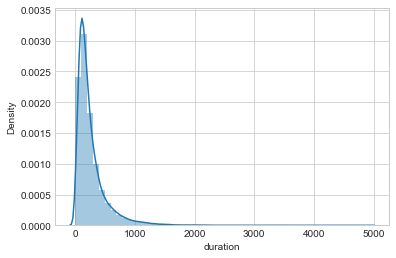

In [255]:
sns.distplot(df.duration)

In [256]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [257]:
len(df.duration.unique())

1544

In [258]:
# from these we can understand that duration is a continous numerical features and distributed with 
# right skew
# The values are given in seconds.but the maximum value from descriptive statistics provided by 
# the describe function is being 4918 seconds ie 82 minutes it might be a mistake
# but since we are not going to use this feature there is no need for any rectification


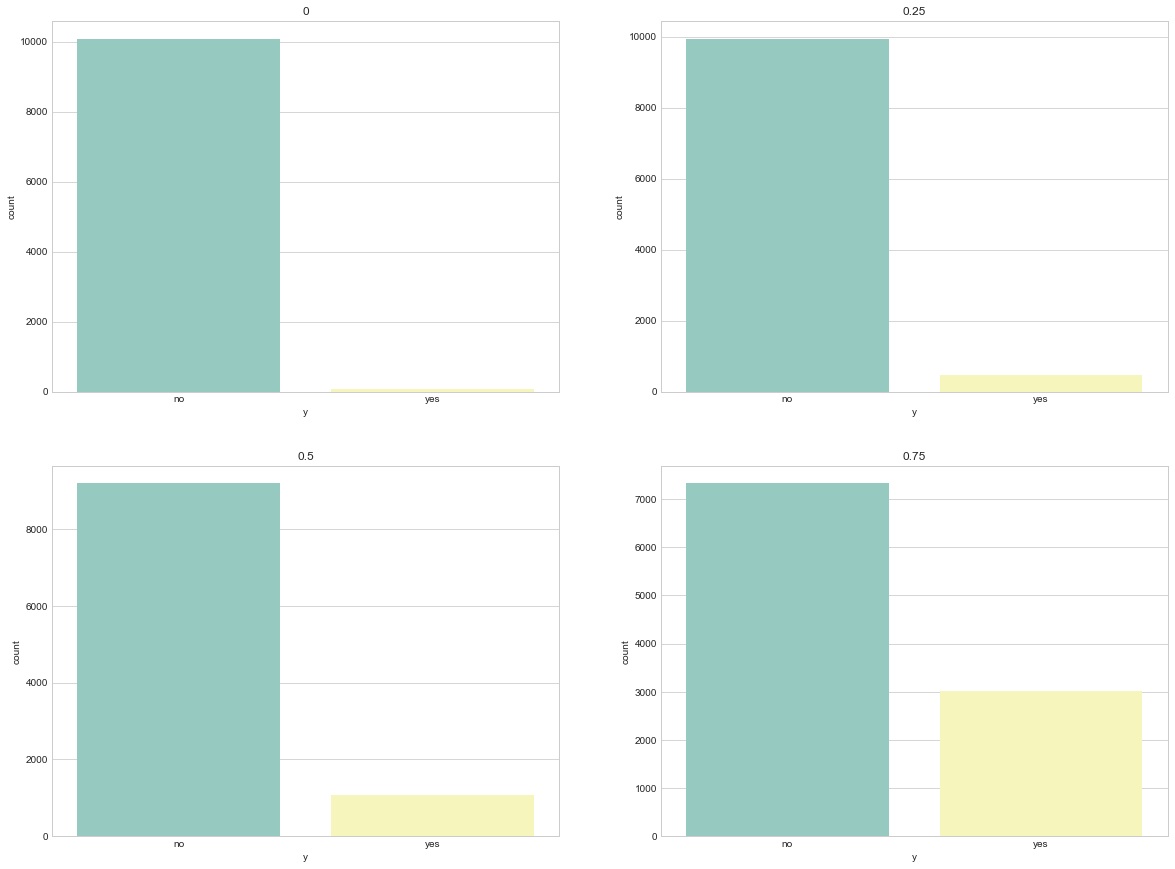

In [259]:
# we will check the target varible distribution in each quartile
a=0
fig,ax = plt.subplots(2,2,figsize = (20,15))
r=0
c=0
while a<1:
    
    low=df.duration.quantile(a)
    high=df.duration.quantile(a+0.25)
    data=df[(df["duration"]>=low) & (df['duration']<high)]
    sns.countplot(data=data,x="y",palette="Set3",ax=ax[r][c])
    ax[r][c].set_title(a)
   
    a=a+0.25
    c=c+1
    
    if c==2:
        r=r+1
        c=0
   
    



In [260]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [261]:
# from the count plot we can see that as the duration of call increase the percentage 
# of success is increasing

### CAMPAIGN

This feature tells the number of contacts performed during this campaign and for this client 

<AxesSubplot:xlabel='campaign', ylabel='y'>

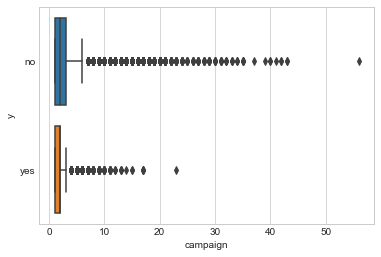

In [262]:
#Plotting using BoxPlot
sns.boxplot(data=df,x="campaign",y="y")

In [263]:
# There is overlapping in this feature so it cant outright predict the outcome

In [264]:
df.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

<AxesSubplot:>

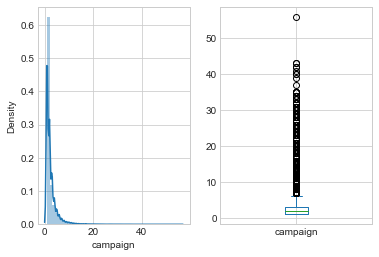

In [265]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['campaign'])
plt.subplot(122)
df['campaign'].plot.box()

In [266]:
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [267]:
# We can that 75% of the people have been contacted less than or equal to 3 times.
#We can also see the maximum number is coming to be 56 which can be a possible outlier 
# if there were enough data for people who haev been contacted more than 5 or 10 times we could have 
# made a subset for those people and done a seperate model for them

<AxesSubplot:xlabel='campaign', ylabel='count'>

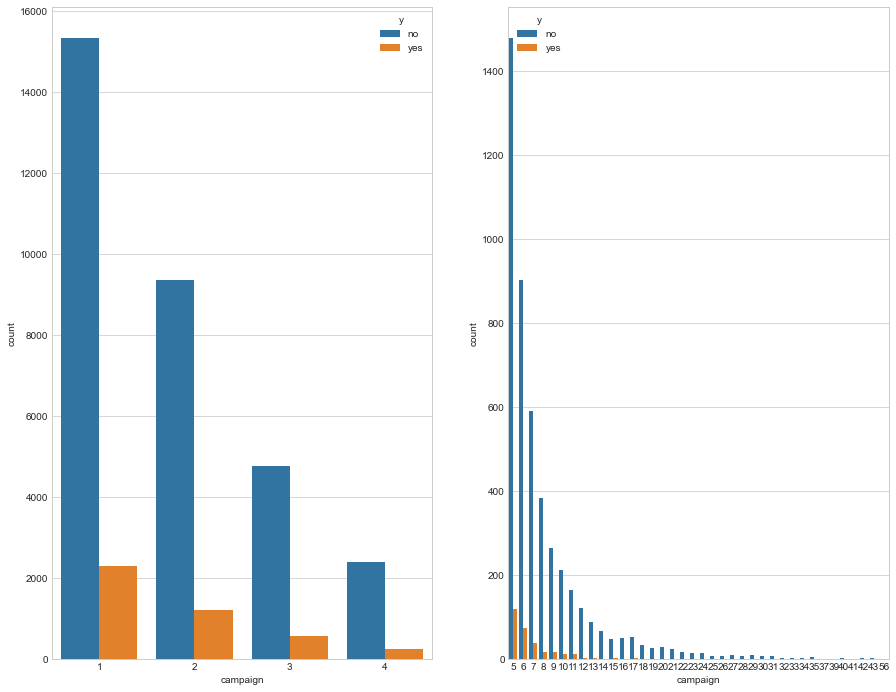

In [268]:
low=df[(df["campaign"]<5)]
high=df[(df["campaign"]>=5)]
plt.figure(figsize=(15,12))
plt.figure(1)
plt.subplot(121)
sns.countplot(data=low,x="campaign",hue="y")
plt.subplot(122)
sns.countplot(data=high,x="campaign",hue="y")

In [269]:
# we can see that after 12 the values are not worth considering at all 
# we can change the graph plots to a meaningful co-ordinates

<AxesSubplot:xlabel='campaign', ylabel='count'>

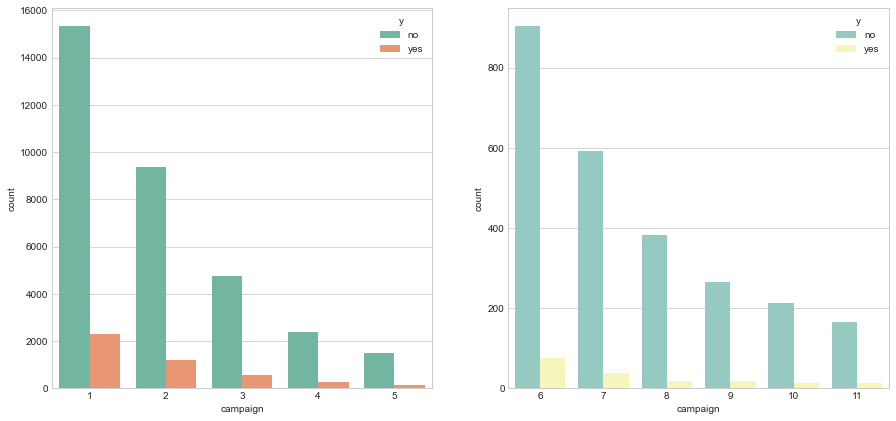

In [270]:
low=df[(df["campaign"]<=5)]
high=df[(df["campaign"]>5)&(df["campaign"]<12)]
plt.figure(figsize=(15,7))
plt.figure(1)
plt.subplot(121)
sns.countplot(data=low,x="campaign",hue="y",palette="Set2")
plt.subplot(122)
sns.countplot(data=high,x="campaign",hue="y",palette="Set3")

In [271]:
# from this we can infer that as the no of instances where a contact has been established and the 
# outcome doesnt have much realtionship
# The ratio of yes and no in each x value is almost the same

## emp.var.rate

**Employment variation rate - quarterly indicator (numeric)<br>**
Employment variation rate aka Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. When the economy is in a recession or depression, people should be more conservative with their money and how the spend it because their financial future is less clear due to cyclical unemployment. When the economy is at its peak, individuals can be more open to risky investments because their employment options are greater.

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

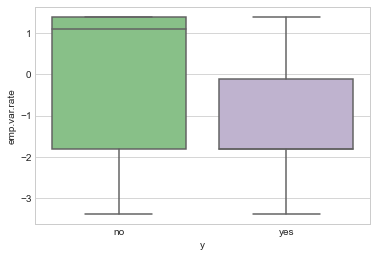

In [272]:
#Boxplot
sns.boxplot(data=df,x="y",y="emp.var.rate",palette="Accent")

In [273]:
# The boxplot revelas there is considerable seperation between the two 
# classes of target using the emp var rate making it a good predictor.
# obviously so bacause if there is instability in the employment status people will be 
# hesitant to invest 

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

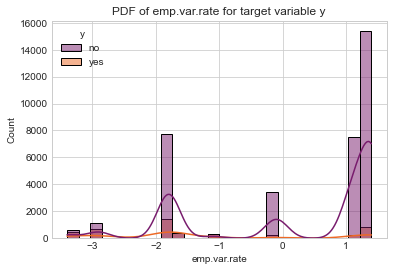

In [274]:
sns.histplot(data=df,hue="y",x="emp.var.rate",palette="inferno",kde=True)
plt.title('PDF of emp.var.rate for target variable y')

In [275]:
# We can see the peaks for NO are increasing when the emp var rate is increasing

In [276]:
# Cross Tab
# The Cross tab says the percentage of "yes" and "No" in different classes of emp.var.rate

pd.crosstab(df["emp.var.rate"],df["y"],normalize="index")*100

y,no,yes
emp.var.rate,,
-3.4,57.609711,42.390289
-3.0,48.837209,51.162791
-2.9,64.281419,35.718581
-1.8,84.091899,15.908101
-1.7,47.865459,52.134541
-1.1,52.598425,47.401575
-0.2,90.000000,10.000000
-0.1,93.700787,6.299213
1.1,96.908412,3.091588


In [277]:
# we can see the  differnce increasing between no and yes while we travel from -3.4 to 1.4
# After -1.1 the no/yes ratio comes in the order of 90:10

## cons.conf.idx


A **consumer confidence index (CCI)** is an economic indicator published by various organizations in several countries.

In simple terms, increased consumer confidence indicates economic growth in which consumers are spending money, indicating higher consumption. Decreasing consumer confidence implies slowing economic growth, and so consumers are likely to decrease their spending. The idea is that the more confident people feel about the economy and their jobs and incomes, the more likely they are to make purchases. Declining consumer confidence is a sign of slowing economic growth and may indicate that the economy is headed into trouble.

<AxesSubplot:xlabel='y', ylabel='cons.conf.idx'>

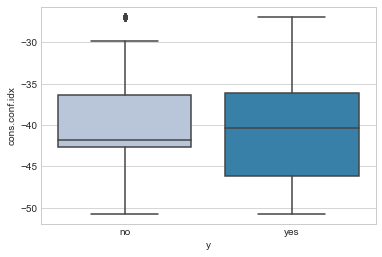

In [278]:
#Boxplot
sns.boxplot(data=df,x="y",y="cons.conf.idx",palette="PuBu")

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

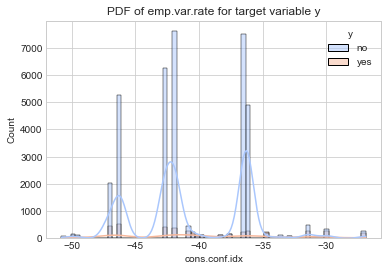

In [279]:
sns.histplot(data=df,hue="y",x="cons.conf.idx",palette="coolwarm",kde=True)
plt.title('PDF of emp.var.rate for target variable y')

In [280]:
# Cross Tab
# The Cross tab says the percentage of "yes" and "No" in different classes of emp.var.rate

pd.crosstab(df["cons.conf.idx"],df["y"],normalize="index")*100

y,no,yes
cons.conf.idx,,
-50.8,54.687500,45.312500
-50.0,55.319149,44.680851
-49.5,54.411765,45.588235
-47.1,82.017901,17.982099
-46.2,90.956162,9.043838
-45.9,90.000000,10.000000
-42.7,93.911743,6.088257
-42.0,94.745575,5.254425
-41.8,95.701875,4.298125


In [281]:
# The analysis shows not much pattern or variation in target using teh consumer confidence index
# This is opposite to the theory we have studied and we will look into this later

## cons.price.idx

**Consumer price index** is referred to as that index that is used in calculating the retail inflation in the economy by tracking the changes in prices of most commonly used goods and services.

In other words, the consumer price index calculates the changes in price of a common basket of goods and services. It is also called a market basket and is used for calculating the price variations in fixed items.

CPI can be used to calculate the cost of living of the people of a country and also the changes in the purchasing power of the currency of a nation.

<AxesSubplot:xlabel='y', ylabel='cons.price.idx'>

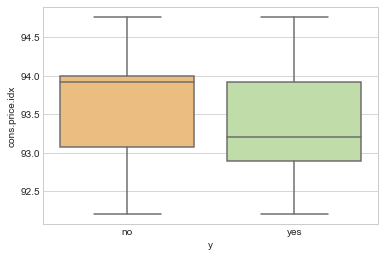

In [282]:
#Boxplot
sns.boxplot(data=df,x="y",y="cons.price.idx",palette="Spectral")

In [283]:
# There is a clear seperation in the median line of both classes but the values of cons.price 
# index are very close to each other 

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

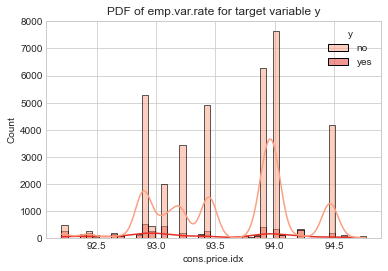

In [284]:
sns.histplot(data=df,hue="y",x="cons.price.idx",palette="Reds",kde=True)
plt.title('PDF of emp.var.rate for target variable y')

In [285]:
# Cross Tab
# The Cross tab says the percentage of "yes" and "No" in different classes of cons.price.index

pd.crosstab(df["cons.price.idx"],df["y"],normalize="index")*100

y,no,yes
cons.price.idx,,
92.201,65.714286,34.285714
92.379,60.299625,39.700375
92.431,59.731544,40.268456
92.469,62.921348,37.078652
92.649,52.941176,47.058824
92.713,48.837209,51.162791
92.756,90.000000,10.000000
92.843,55.319149,44.680851
92.893,90.956162,9.043838


In [286]:
# No visible pattern in the crosstab as the values of the consumer price index 
# are in a very small range

## euribor3m

The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. 

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

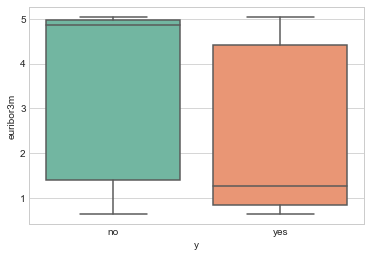

In [287]:
#Boxplot
sns.boxplot(data=df,x="y",y="euribor3m",palette="Set2")

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

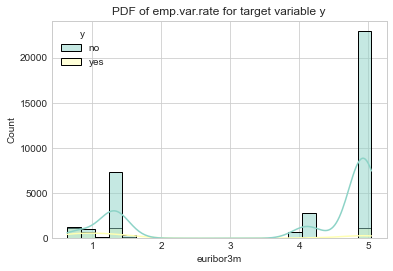

In [288]:
sns.histplot(data=df,hue="y",x="euribor3m",palette="Set3",kde=True)
plt.title('PDF of emp.var.rate for target variable y')

From the above plot, we can clearly see the difference in median for both the classes. This indicates that the feature can be very useful for our case study. But we can validate the assumption only by applying models and extracting feature importance.

## nr.employed

 number of employees - quarterly indicator 

<AxesSubplot:xlabel='y', ylabel='nr.employed'>

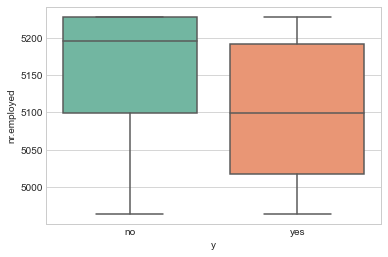

In [289]:
sns.boxplot(data=df,x="y",y="nr.employed",palette="Set2")

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

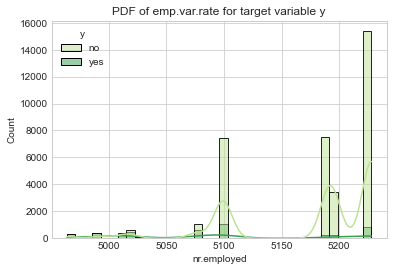

In [290]:
sns.histplot(data=df,hue="y",x="nr.employed",palette="YlGn",kde=True)
plt.title('PDF of emp.var.rate for target variable y')

In [291]:
# In this feature also there is noticeable class seperation which makes it a good indicator
# The number of employees  has a positive effect for turning people to subscribe to the term deposit.
# This can be due to the fact that the more employees the bank has, 
# the more influential and prestigious this bank is.

In [292]:
categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

## Visualization of categorical features

We will make user defined functions to find the frequency distribution of the various categorical features

In [293]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [294]:

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

## Job

The job done by the customer

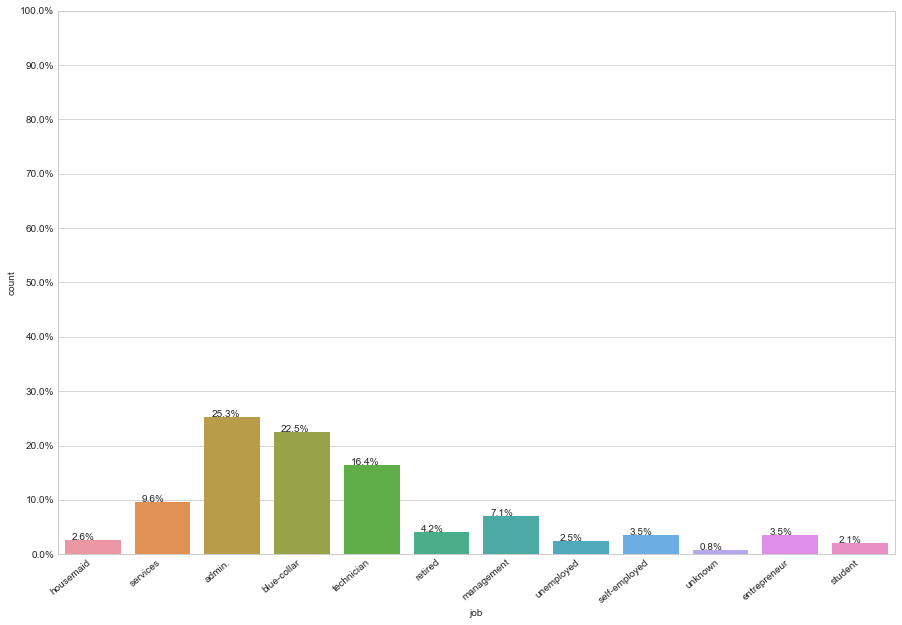

In [295]:
countplot("job", df)

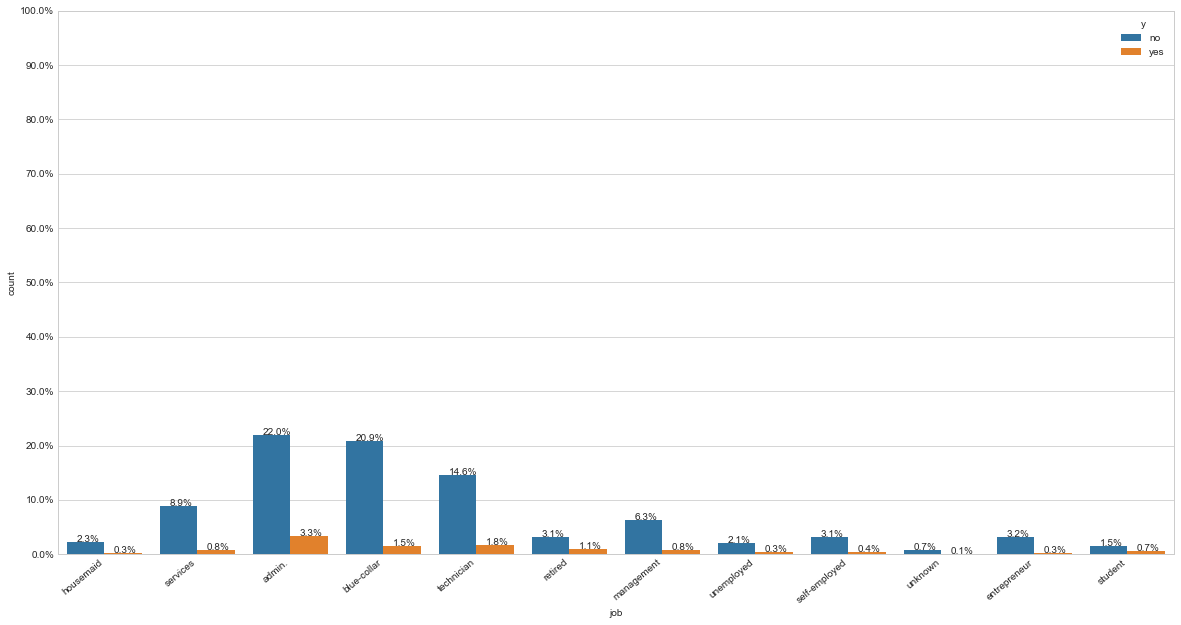

In [296]:
countplot_withY("job", df)

<AxesSubplot:xlabel='job'>

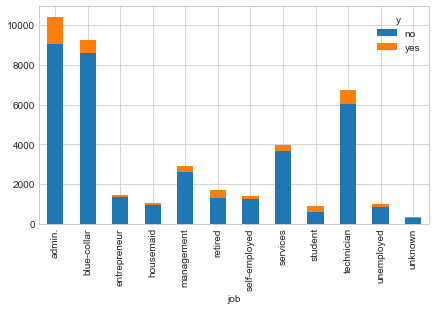

In [297]:
job=pd.crosstab(df["job"],df['y'])
job.plot(kind="bar",stacked=True,figsize=(7,4))

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

The “Blue-Collar are the ones who have said NO to call while the ones who are “Retired” or working at ”Admin” post comparatively said YES.

## Marital status

The feature tells the customer is married or not

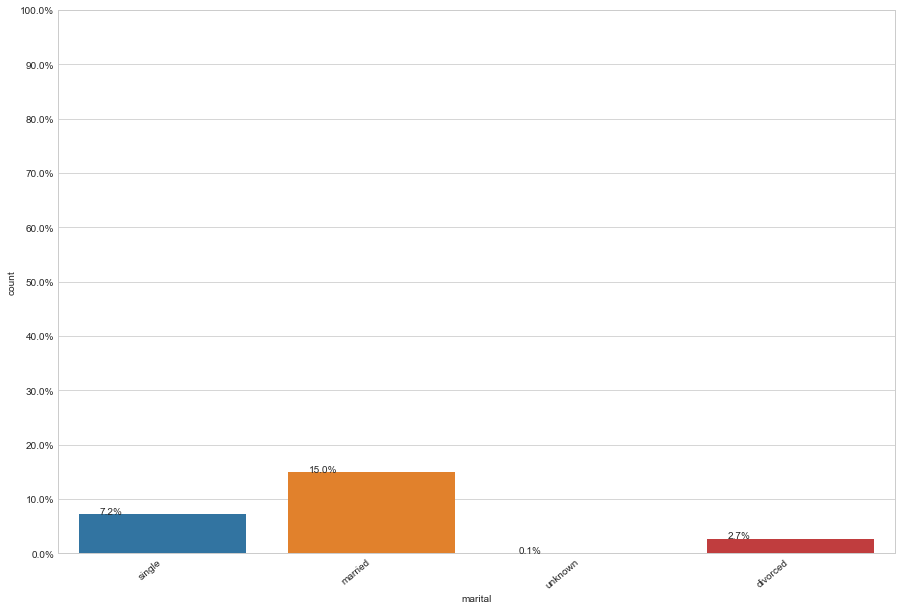

In [298]:
countplot("marital", data)

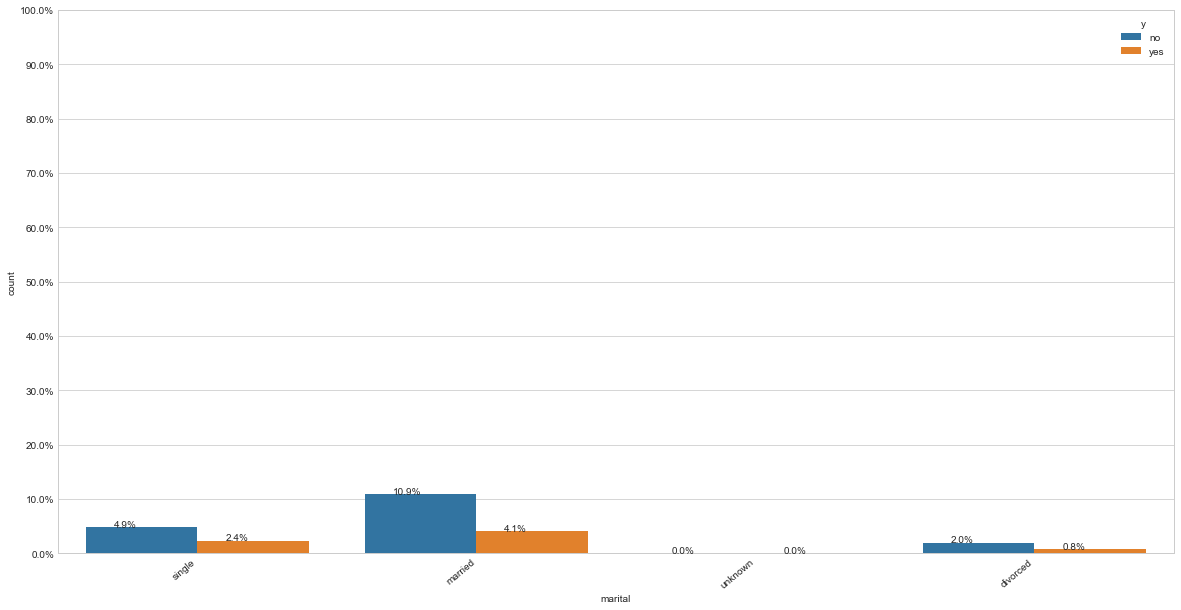

In [299]:
countplot_withY("marital", data)

<AxesSubplot:xlabel='marital'>

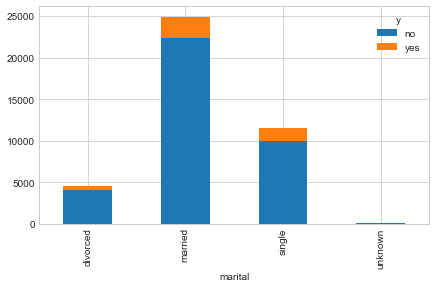

In [300]:
Marital=pd.crosstab(df["marital"],df['y'])
Marital.plot(kind="bar",stacked=True,figsize=(7,4))


Majority of the customers are married. Followed by Single, divorced and unknown.

## Housing

The customer is having a housing loan or not

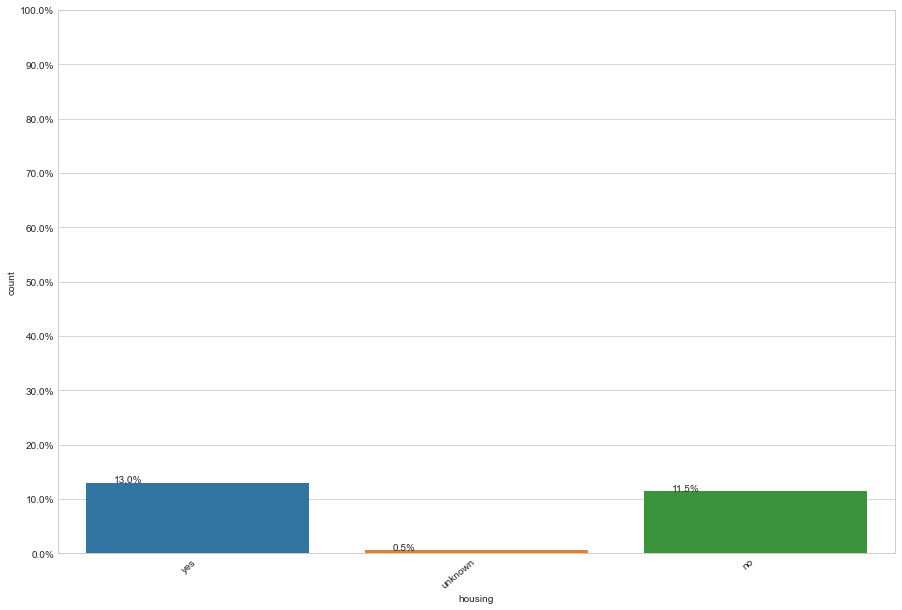

In [301]:
countplot("housing", data)

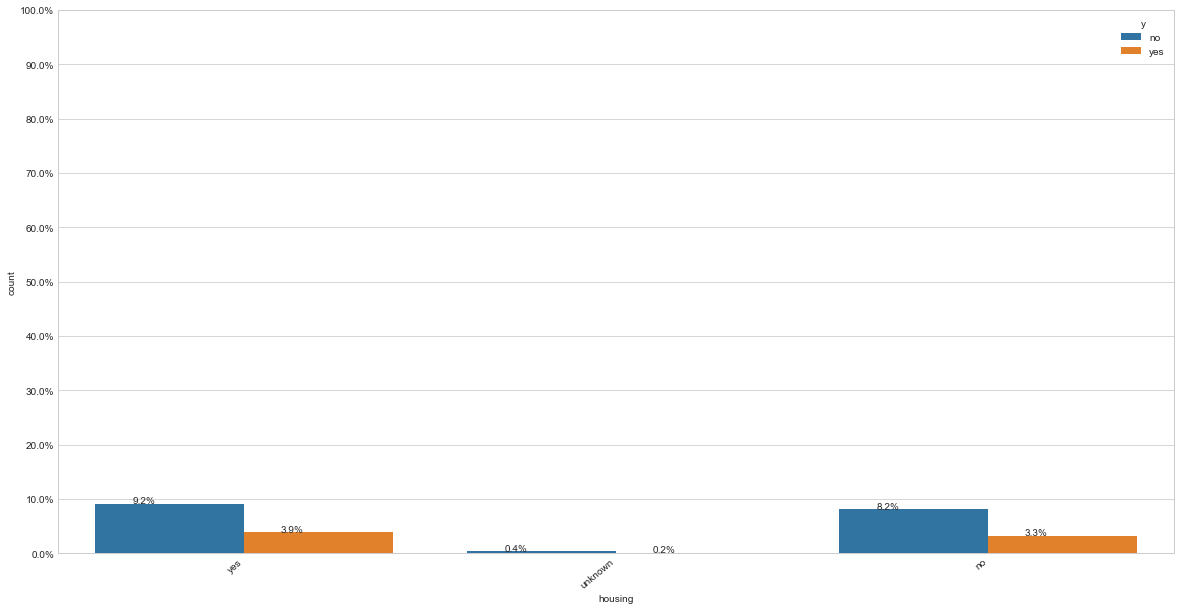

In [302]:
countplot_withY("housing", data)

<AxesSubplot:xlabel='housing'>

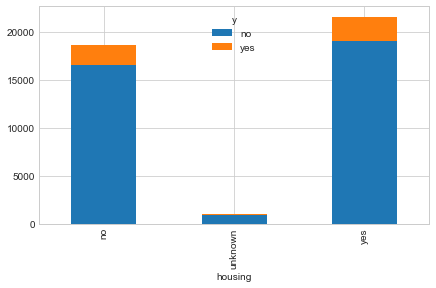

In [303]:
Housing=pd.crosstab(df["housing"],df['y'])
Housing.plot(kind="bar",stacked=True,figsize=(7,4))

## Contact

The feature mentions the  mode of communication 

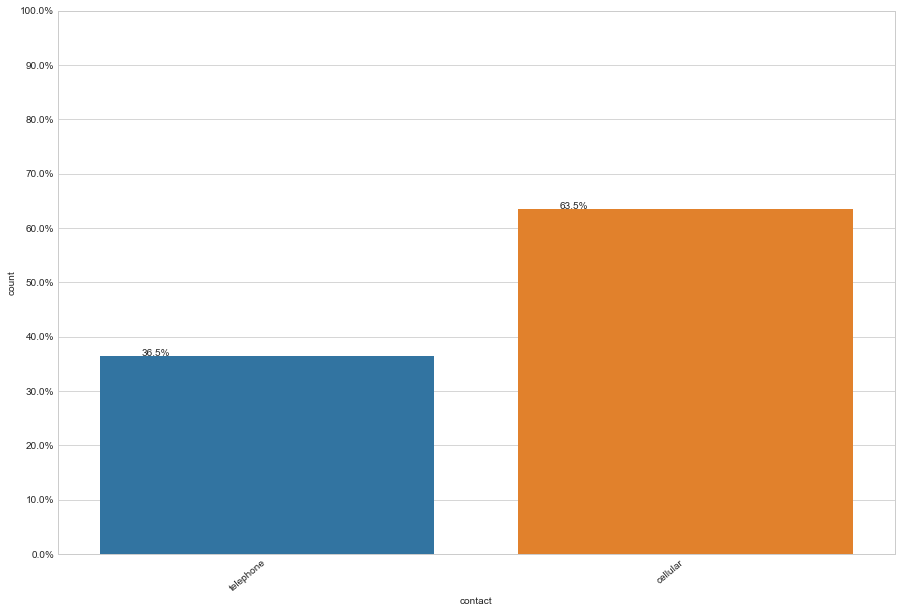

In [304]:
countplot("contact", df)

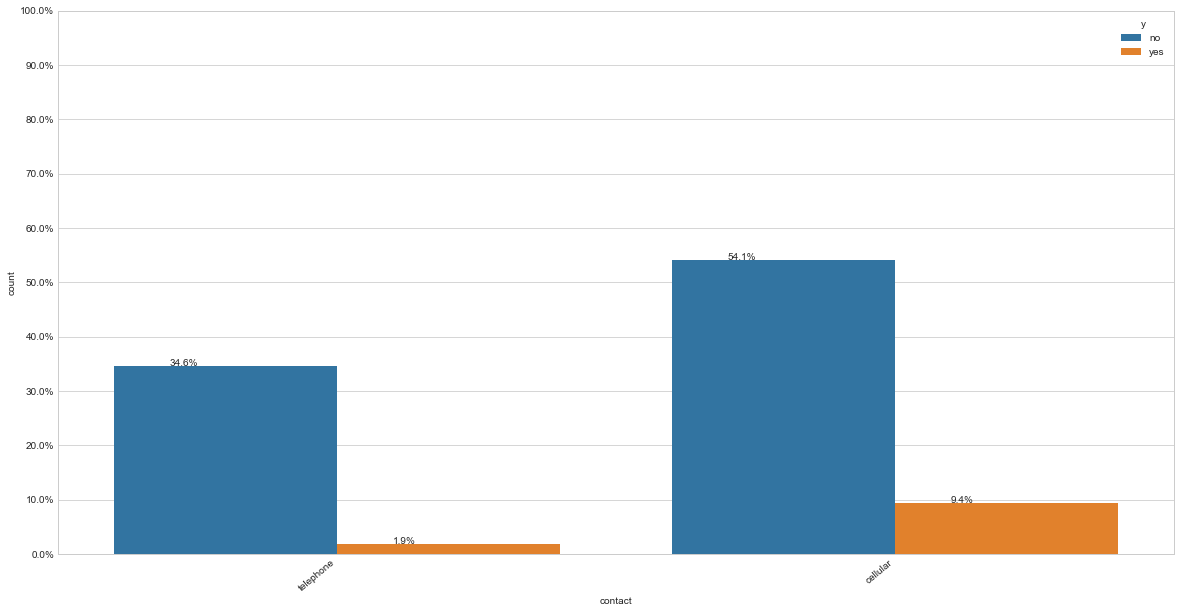

In [305]:
countplot_withY("contact", df)

<AxesSubplot:xlabel='contact'>

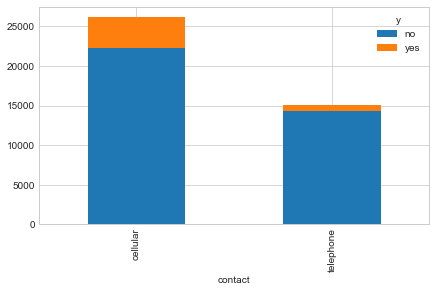

In [306]:
contact=pd.crosstab(df["contact"],df['y'])
contact.plot(kind="bar",stacked=True,figsize=(7,4))

There is comparitively high chance for yes when the contact is made through cellular.<br>
But we cant justify a logical reason for that,Since most of the population is having a cellphone<br>
Another reason maybe the telephone numbers maybe office numbers which doesnt point to a particular individual.

## Loan

The consumer has personal loan or not

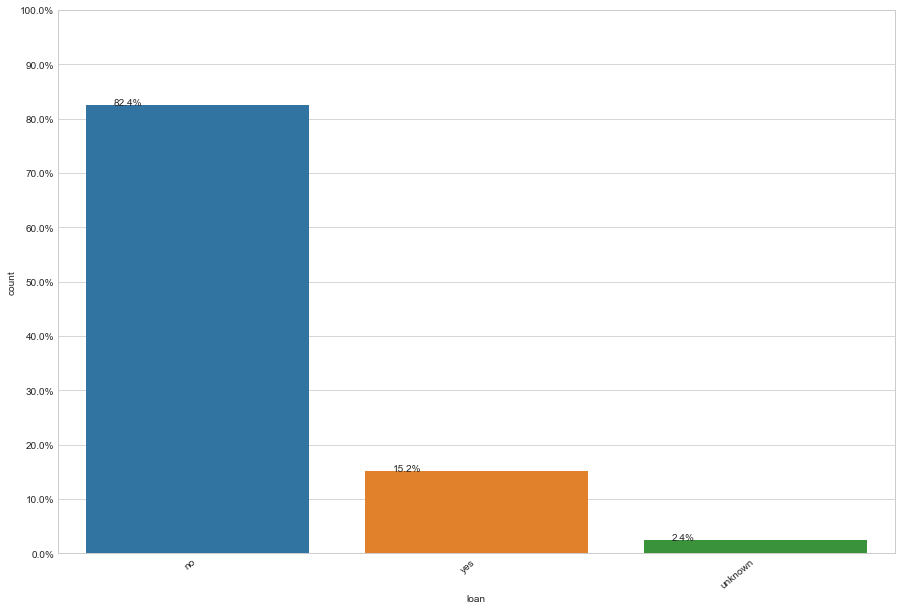

In [307]:
countplot("loan", df)

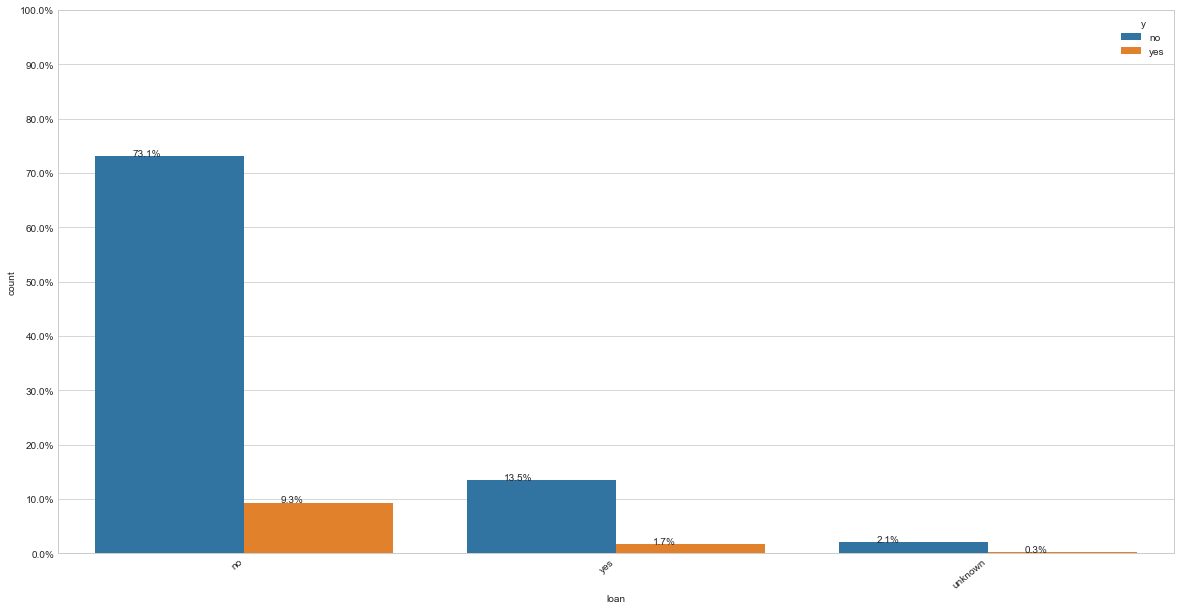

In [308]:
countplot_withY("loan", df)

<AxesSubplot:xlabel='loan'>

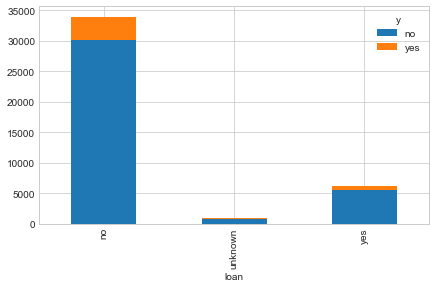

In [309]:
loan=pd.crosstab(df["loan"],df['y'])
loan.plot(kind="bar",stacked=True,figsize=(7,4))

 People having personal Loan or Housing Loans didn’t Prefer to join for FD’s.

## Default

The consumer has defaulted the credit card or not

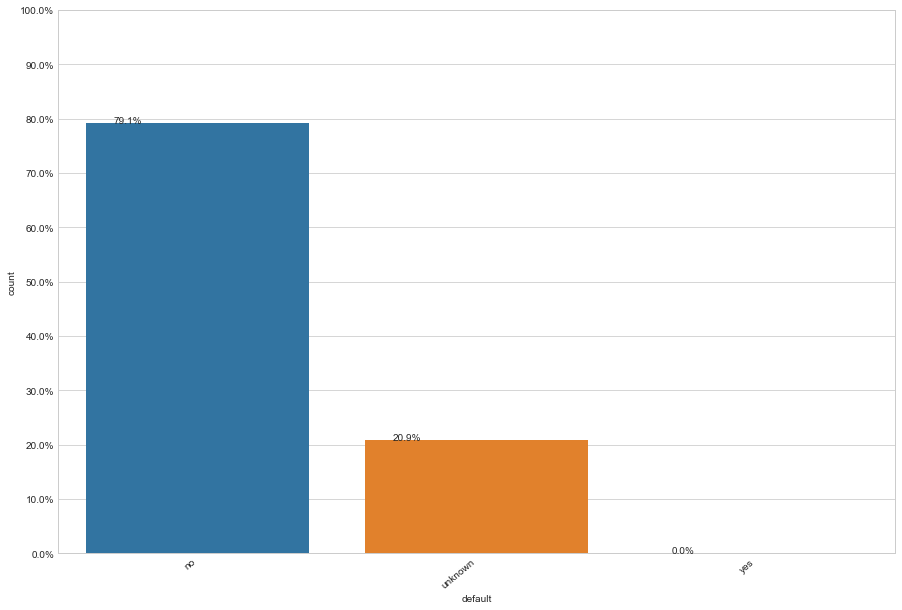

In [310]:
countplot("default", df)

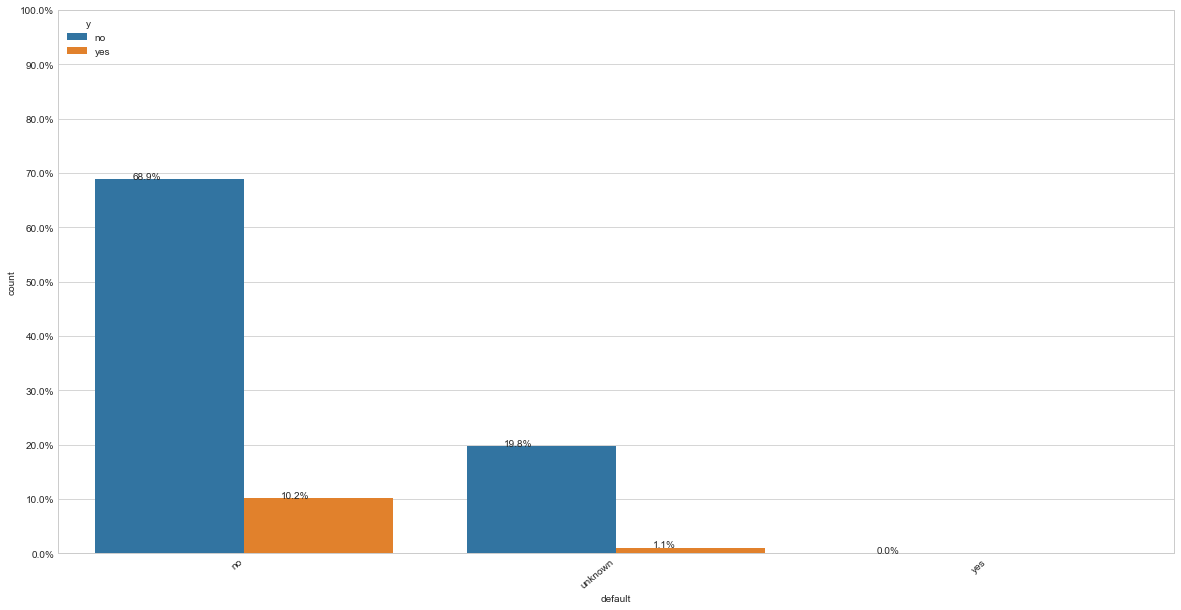

In [311]:
countplot_withY("default", df)

<AxesSubplot:xlabel='default'>

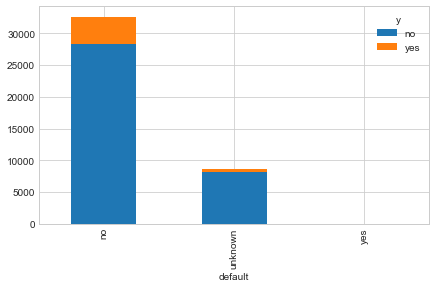

In [312]:
default=pd.crosstab(df["default"],df['y'])
default.plot(kind="bar",stacked=True,figsize=(7,4))


There is no data in the category of loan defaulters so this feature division is not logical

## Education

The educational qualification of the customer

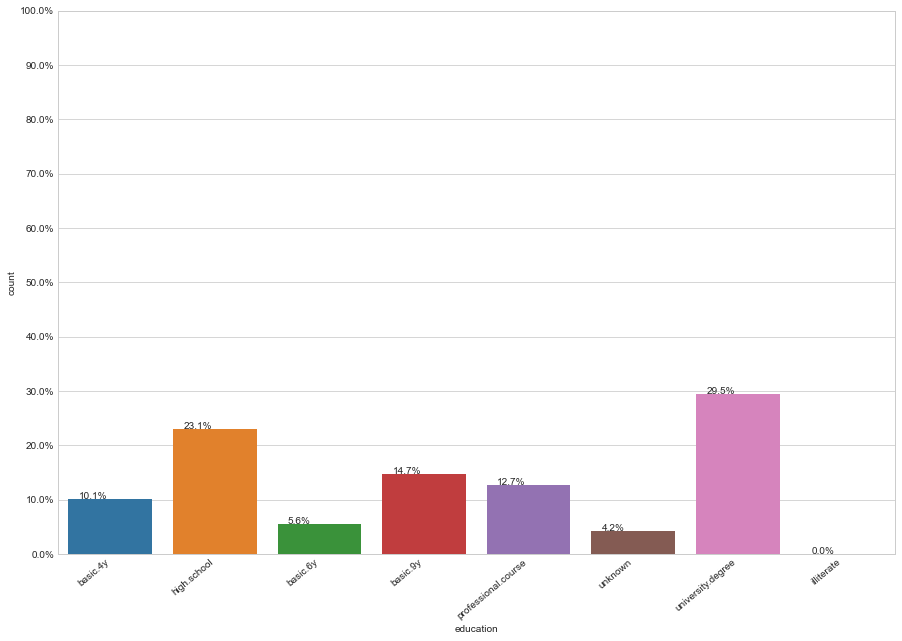

In [313]:
countplot("education", df)

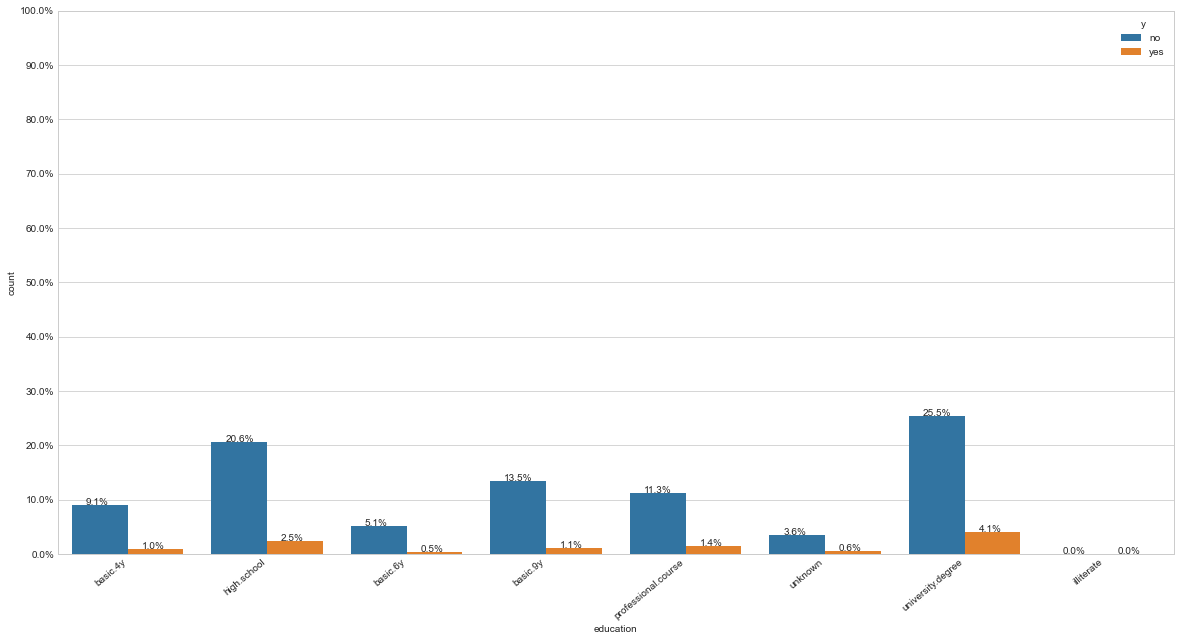

In [314]:
countplot_withY("education", df)

<AxesSubplot:xlabel='education'>

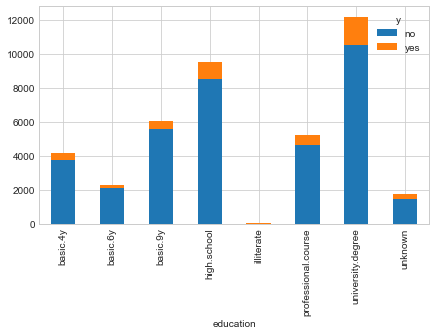

In [315]:
Education=pd.crosstab(df["education"],df['y'])
Education.plot(kind="bar",stacked=True,figsize=(7,4))


People with university degree have a high tendency of saying yes to a marketing call<br>
We can assume that people who are having university degree has a chance of having good jobs so more money to invest in savings

## Month

The month when the contact has been made

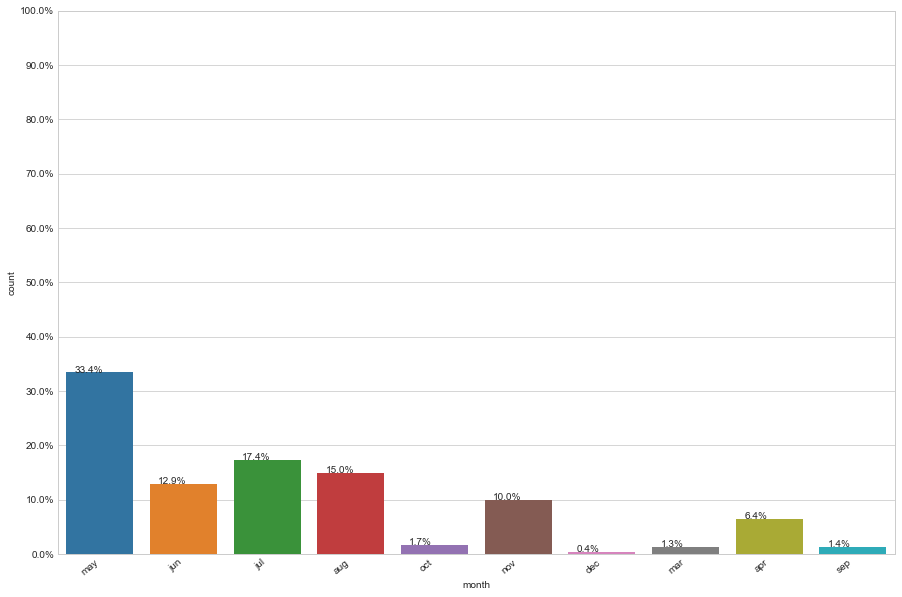

In [316]:
countplot("month", df)

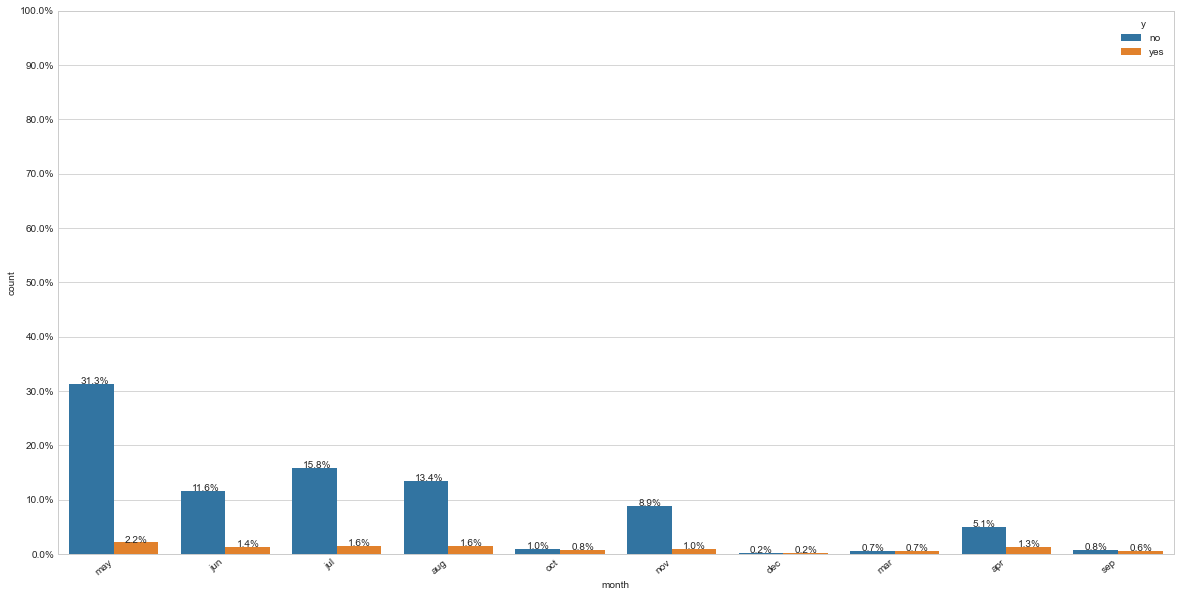

In [317]:
countplot_withY("month", df)

<AxesSubplot:xlabel='month'>

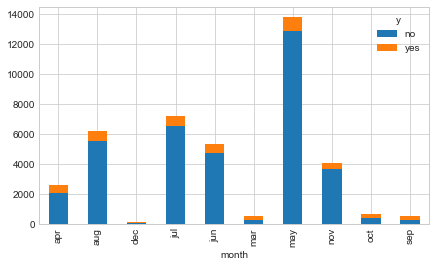

In [318]:
month=pd.crosstab(df["month"],df['y'])
month.plot(kind="bar",stacked=True,figsize=(7,4))

In the month of April we have seen large numbers getting converted while in the May maximum turning up to say no. the only Reason we could figure out was in the month of April they had Financial Year End.

## Day of week

The day of the week when the contact has been made

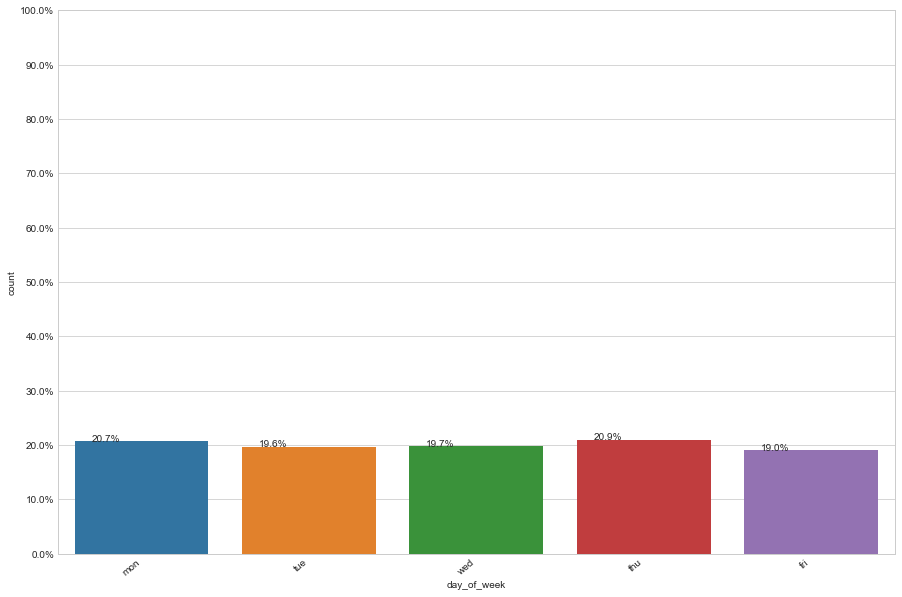

In [319]:
countplot("day_of_week", df)

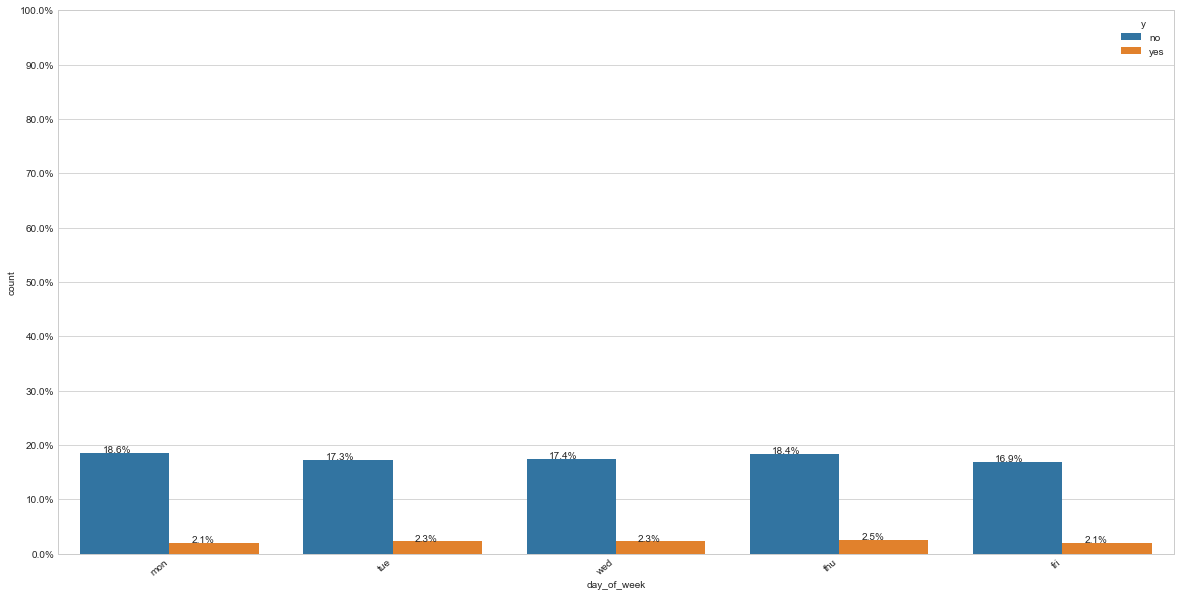

In [320]:
countplot_withY("day_of_week", df)

<AxesSubplot:xlabel='day_of_week'>

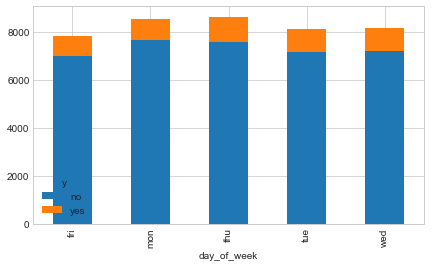

In [321]:
day_of_week=pd.crosstab(df["day_of_week"],df['y'])
day_of_week.plot(kind="bar",stacked=True,figsize=(7,4))

In [322]:
pd.crosstab(df["day_of_week"],df['y'],normalize="index")

y,no,yes
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


Almost everyday has same rate of acceptance

The calls made are also same throught the week(weekdays)

##  Poutcome

The outcome of the previous campaigning call that has been made

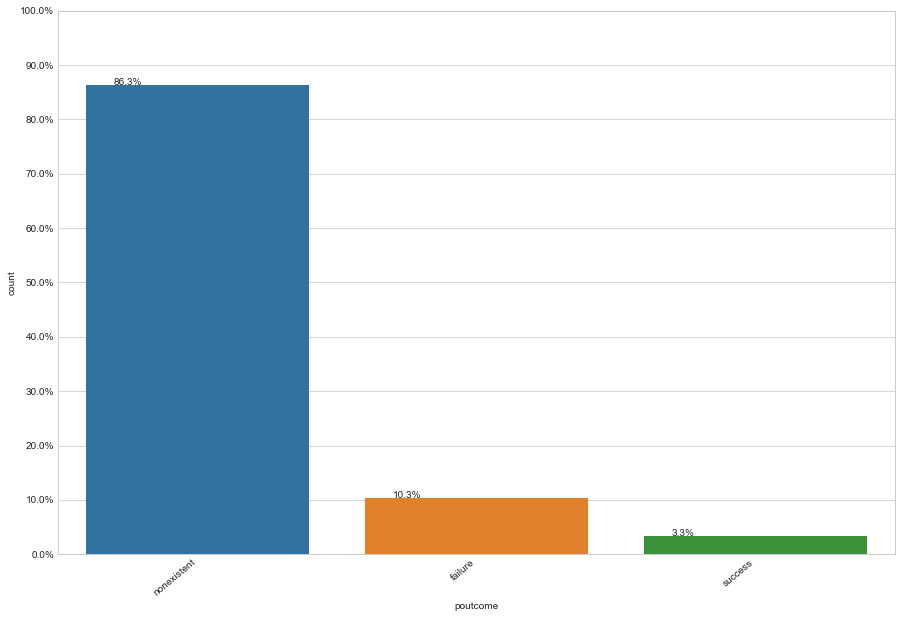

In [323]:
countplot("poutcome", df)

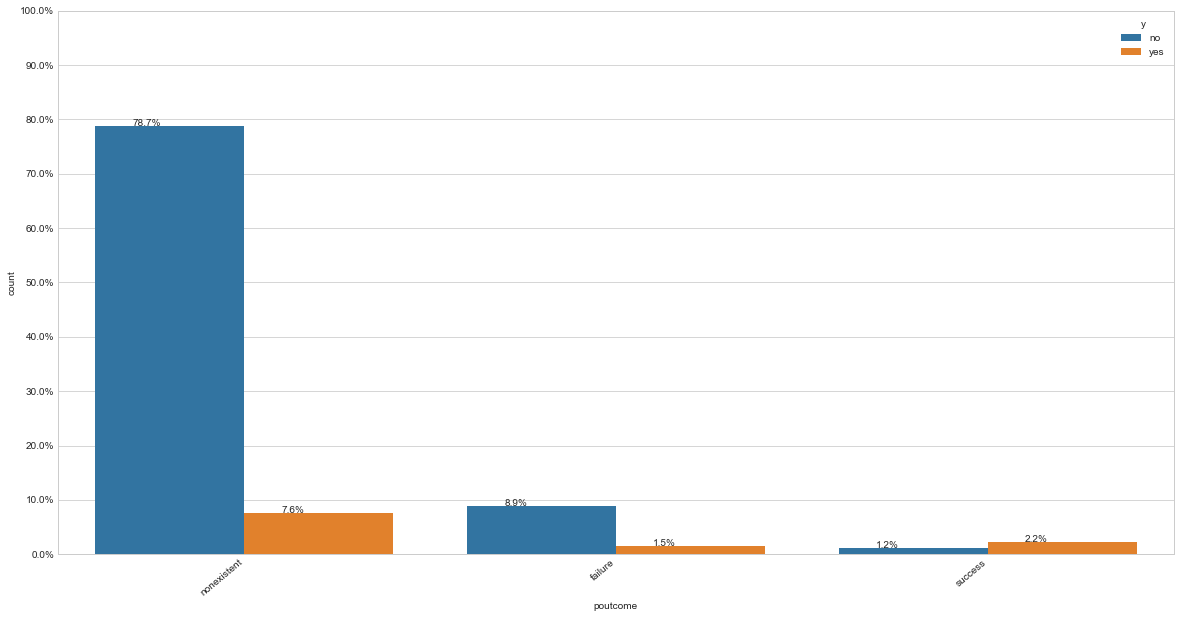

In [324]:
countplot_withY("poutcome", df)

<AxesSubplot:xlabel='poutcome'>

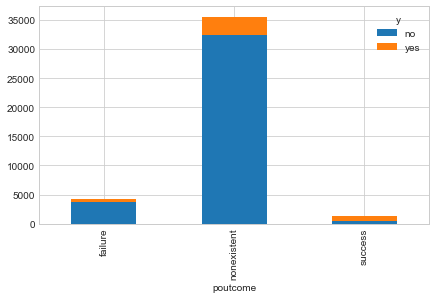

In [325]:
p_outcome=pd.crosstab(df["poutcome"],df['y'])
p_outcome.plot(kind="bar",stacked=True,figsize=(7,4))

We have received great Response from the people who already had engagements with the bank previously for some other campaigns

But 86% of the datapoints are missing values so any model building with this feature is not practical

## Heatmap

We are going to plot the heatmap and understand the correlation between the features

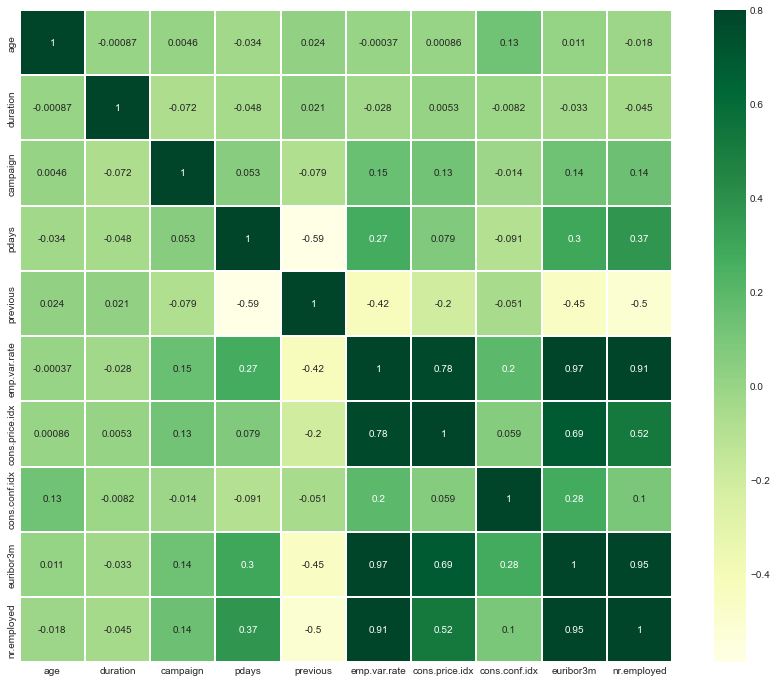

In [326]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap='YlGn', annot=True, linewidth=0.1)
plt.show()

From the heatmap we can see that euribor3m and emp.var.rate are highly correlated(0.97),also euribor3m and nr.employed having an correlation of 0.95 so either of these features can be retained and others omiited

## FEATURE ENGINEERING

**The above operations will wrap up most of the visualizations that can be done with this dataset<br>
Now we can focus on the feature engineering part<br>
We will be doing Missing value imputation,outlier handling,Transformation,Encoding,PCA,Feature Elimination/Selection etc in the Feature Engineering part**

## Missing values

In [327]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("")
    print("")
    

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital
['married' 'single' 'divorced' 'unknown']


education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default
['no' 'unknown' 'yes']


housing
['no' 'yes' 'unknown']


loan
['no' 'yes' 'unknown']


contact
['telephone' 'cellular']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']


duration
[ 261  149  226 ... 1246 1556 1868]


campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 4

In [328]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
agegroup          0
agegroup2         0
dtype: int64

If we look at the isnull command results we can see there are no missing values present in the dataset,but if we check the unique values of each column we can see variables like "unknown" and "999" in some columns which refer to missing values.<br>Therefore we need to impute meaningful values instead of these terms.

### Finding columns with the variable "unknown"

In [329]:
missing_value_list=[]
list1=["unknown"]
for col in df.columns:
    if any(df[col].isin(list1))==True:
        missing_value_list.append(col)
print(missing_value_list)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [330]:
# So these columns have missing values

### Missing value treatment

We will replace the unknown with NaN value

In [331]:
df1 = df.replace('unknown', np.nan)
df1.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
agegroup             0
agegroup2            0
dtype: int64

One way to clean dataset is to delete it, but it gives a bad image of the data and it is unrealistic. Another way is to find some correlation between the data and fill it in

Now, to infer the missing values in ‘job’ and ‘education’, we make use of the cross-tabulation between ‘job’ and ‘education’. Our hypothesis here is that ‘job’ is influenced by the ‘education’ of a person. Hence, we can infer ‘job’ based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict education.

#### Education

In [332]:
# predicting education from job
pd.crosstab(df["job"],df["education"])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever ‘job’ = management and ‘education’ = unknown, we can replace ‘education’ with ‘university.degree’. Similarly, ‘job’ = ‘services’ → ‘education’ = ‘high.school’ and ‘job’ = ‘housemaid’ → ‘education’ = ‘basic.4y’.

In [333]:
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df["education"]=="unknown") & (df["job"]=="technician"),'education']= "professional.course"
df.loc[(df["education"]=="unknown") & (df["job"]=="entrepreneur"),'education']= "university.degree"

Similiarly we can do imputation of job from education also

In [334]:
pd.crosstab(df["education"],df["job"])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,516,100,597,93,132,26,58,112,52
basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2832,357,873,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3532,142,12
university.degree,5753,94,667,139,2186,285,765,173,170,1809,262,45
unknown,249,454,0,0,0,98,29,0,167,0,19,131


In [335]:
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

#### job with age

In [336]:
pd.crosstab(df["agegroup2"],df["job"])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
agegroup2,,,,,,,,,,,,
"(0, 30]",2146,1497,138,59,266,5,260,915,736,1167,169,25
"(30, 45]",5943,5343,813,477,1578,59,752,2143,136,4080,561,89
"(45, 60]",2286,2495,497,470,1050,978,400,909,3,1472,277,84
"(60, 100]",47,24,8,54,30,678,9,2,0,36,7,15


We can also see, if ‘age’ > 60, then the ‘job’ is ‘retired,’ which makes sense.

In [337]:
df.loc[(df["age"]>60) & (df["job"]=="unknown"),"job"]="retired"

In [338]:
# now we can check the number of missing values again

In [339]:
df1 = df.replace('unknown', np.nan)
df1.isnull().sum()

age                  0
job                198
marital             80
education         1147
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
agegroup             0
agegroup2            0
dtype: int64

**Rest of the missing values we can fill using the mode of the columns**

In [340]:
df = df.replace('unknown', np.nan)

In [341]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['default'] = df['default'].fillna(df['default'].mode()[0])
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])

In [342]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
agegroup          0
agegroup2         0
dtype: int64

Now all the missing values have been taken care of

### Missing value in pdays

In [343]:
df.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

We can see that 97% of the people has not been contacted before and given the value so its better to delete this particular feature which contribute very less variation but adding to the dimensionality

In [344]:
df.drop(labels=["pdays"],axis=1,inplace=True)

In [345]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup,agegroup2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]","(45, 60]"


## Outlier detection

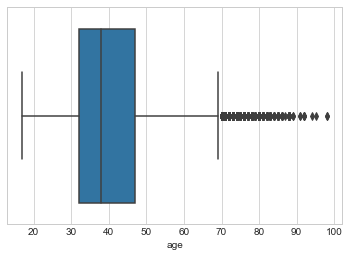

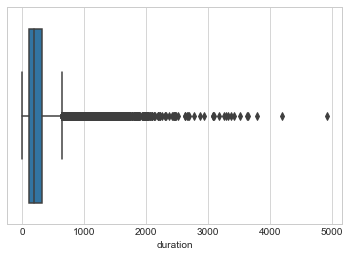

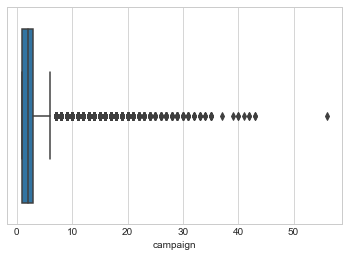

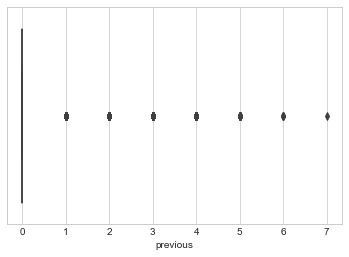

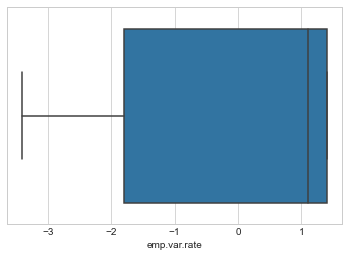

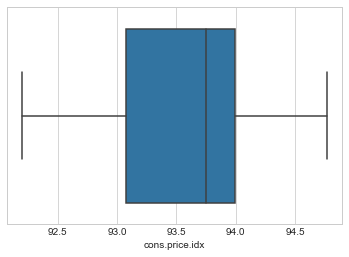

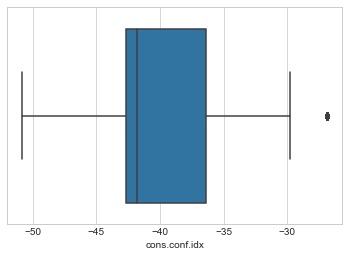

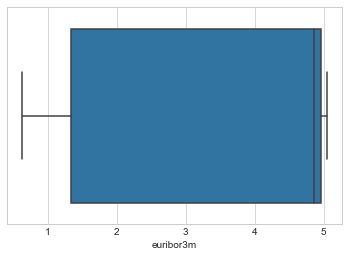

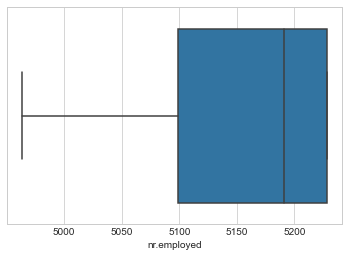

In [346]:
numerical=df.select_dtypes(include=np.number)
for col in numerical.columns:
    sns.boxplot(x=df[col])
    plt.show()

From the boxplot we can see that age,previous,duration,campaign are having outliers. <br>
Since duration cannot be used for the prediction we can ignore that<br>
The values for age and previous are practical values and should not be deleted.<br>
The campaign feature is having some outliers and might be unrealistic but we cant be so sure.So it is better we keep the outliers as much and proceed with the model building.<br>
The outliers may not affect when we do a standardization

In [347]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [348]:
df.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [349]:
df.campaign.value_counts().head(5)

1    17642
2    10570
3     5341
4     2651
5     1599
Name: campaign, dtype: int64

## Dropping unneccesary columns

In [350]:
df.corr()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
previous,0.024365,0.020640,-0.079141,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


From this correlation matrix we can see that euribor3m and emp.var.rate are having a correlation of 0.972
So we can choose one to keep.<br>
We will drop euribor3m since it has high correlation with nr.employed also.

In [351]:
df.drop("euribor3m",inplace=True,axis=1)

We have age columns where have done discretization.We can keep one discretized column and drop the others

In [352]:
df.drop(labels=["age","agegroup"],axis=1,inplace=True)

In [353]:
# dropping duration since it is not a metric we get before the call is made and is 
# mentioned in the dataset itself

In [354]:
df.drop(labels=["duration"],axis=1,inplace=True)

In [355]:
# crosstab of default and target
pd.crosstab(df.default,df.y)

y,no,yes
default,,
no,36545,4640
yes,3,0


In [356]:
# since all there are no values in the yes section we can drop it as it doesnot give any information

In [357]:
# dropping default column
df = df.drop("default",axis=1)

In [358]:
df['y'].replace({"no":0, "yes":1}, inplace=True)

In [359]:
# Saving the dataframe to new csv
df.to_csv("data.csv",index=False)

## Train-Test Split

The data can now be split into train and test before transforming the data

In [360]:
y=df["y"]
X=df.drop("y",axis=1)

In [361]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [362]:
X_train.shape

(32950, 16)

In [363]:
X_test.shape

(8238, 16)

In [364]:
y_train.shape

(32950,)

# Transformation

Transformation is done when the variables are not normally distributed and we wanted to make them normally distributed
Since we have negative values also we are going with yeo_johnson method of powertransformer.

In [365]:
from scipy.stats import shapiro
for i in X_train.select_dtypes(exclude="object").columns:
    print(i,shapiro(X_train[i]))

campaign ShapiroResult(statistic=0.552865743637085, pvalue=0.0)
previous ShapiroResult(statistic=0.39074093103408813, pvalue=0.0)
emp.var.rate ShapiroResult(statistic=0.7627565860748291, pvalue=0.0)
cons.price.idx ShapiroResult(statistic=0.9317406415939331, pvalue=0.0)
cons.conf.idx ShapiroResult(statistic=0.9243878126144409, pvalue=0.0)
nr.employed ShapiroResult(statistic=0.787212073802948, pvalue=0.0)


In [366]:
# since all p values are less than 0.05 none of the parameters are normally distributed

In [367]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in X_train.select_dtypes(exclude="object").columns:
    X_train[i] = pt.fit_transform(X_train[[i]])
    X_test[i] = pt.transform(X_test[[i]])

# Weight of Evidence Encoding

In [368]:
# for encoding using feature-engine
from feature_engine.encoding import WoEEncoder as fe_WoEEncoder
from category_encoders.woe import WOEEncoder

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default).

WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
If P(Bads) > P(Goods) the odds ratio will be < 1 and,
WoE will be < 0 if, P(Goods) > P(Bads).
WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

It creates a monotonic relationship between the target and the independent variables.
It orders the categories on a "logistic" scale which is natural for logistic regression
The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

In [369]:
woe_enc = fe_WoEEncoder(variables=["agegroup2","poutcome",'job','marital', 'education', 'housing','loan', 'contact','day_of_week',"month"])
woe_enc.fit(X_train, y_train)
# in the encoder dict we see the woe for each category
# for each of the selected variables
woe_enc.encoder_dict_

{'agegroup2': {'(0, 30]': 0.339249674222709,
  '(30, 45]': -0.20109265721207908,
  '(45, 60]': -0.19361838942686949,
  '(60, 100]': 1.9135476162479865},
 'poutcome': {'failure': 0.2976635607689933,
  'nonexistent': -0.28227024504028025,
  'success': 2.7181406251948173},
 'job': {'admin.': 0.16384422510285,
  'blue-collar': -0.5408068164783827,
  'entrepreneur': -0.27772066405264295,
  'housemaid': -0.07877871287152118,
  'management': -0.01936721995276928,
  'retired': 0.9934570064640565,
  'self-employed': -0.1130061566797918,
  'services': -0.3875154828414161,
  'student': 1.2821978402640795,
  'technician': -0.04106924313361379,
  'unemployed': 0.23279953437738257},
 'marital': {'divorced': -0.10674552902738799,
  'married': -0.11520842467724758,
  'single': 0.253705833110956},
 'education': {'basic.4y': -0.0672050297315086,
  'basic.6y': -0.3952154770608013,
  'basic.9y': -0.4002924891508507,
  'high.school': -0.05520921557966657,
  'illiterate': 0.8599256138395339,
  'professional

In [370]:
X_train_woe = woe_enc.transform(X_train)
X_test_woe = woe_enc.transform(X_test)

### Model after Transformation + Encoding

In [371]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [372]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()


logi.fit(X_train_woe,y_train)
y_train_pred=logi.predict(X_train_woe)
y_test_pred=logi.predict(X_test_woe)

In [373]:
print("Train classification report ",classification_report(y_train,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29238
           1       0.64      0.23      0.34      3712

    accuracy                           0.90     32950
   macro avg       0.77      0.61      0.64     32950
weighted avg       0.88      0.90      0.88     32950

Train accuracy score  0.8986949924127466
Train confusion matrix  [[28741   497]
 [ 2841   871]]


In [374]:
print("Test classification report ",classification_report(y_test,y_test_pred),sep="\n\n")
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.60      0.22      0.32       928

    accuracy                           0.90      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238

Test  accuracy score  0.8953629521728574
Test  confusion matrix  [[7170  140]
 [ 722  206]]


## Scaling

We can use Robust scaler for transformation as the dataset contains outliers.<br>
One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

This is called robust standardization or robust data scaling.

This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

value = (value – median) / (p75 – p25)
The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values

In [375]:
from sklearn.preprocessing import RobustScaler
rbs=RobustScaler()
X_train_scale=rbs.fit_transform(X_train_woe)
X_test_scale=rbs.transform(X_test_woe)

### Model after Transformation + WoE + Scaling

In [376]:
logi=LogisticRegression()


logi.fit(X_train_scale,y_train)
y_train_pred=logi.predict(X_train_scale)
y_test_pred=logi.predict(X_test_scale)

In [377]:
print("Train classification report ",classification_report(y_train,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29238
           1       0.64      0.23      0.34      3712

    accuracy                           0.90     32950
   macro avg       0.77      0.61      0.64     32950
weighted avg       0.88      0.90      0.88     32950

Train accuracy score  0.8985128983308043
Train confusion matrix  [[28744   494]
 [ 2850   862]]


In [378]:
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report                precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.59      0.22      0.32       928

    accuracy                           0.90      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238

Test  accuracy score  0.8951201747997086
Test  confusion matrix  [[7171  139]
 [ 725  203]]


**There is no impact of scaling on the model accuracy<br>
One reason for this maybe majority of the features have been encoded using log and numerical features have been transformed and standardized**

## Recursive Feature Elimination

We learn about various techniques for selecting the significant features in the dataset. In this example, let us consider the RFE method for feature selection.

We build the whole model and the beta which is least significant is eliminated. Least beta value will be the least significant value. We can eliminate more than 2 at a time. How does it work. It assigns a rank. Say we have 10 features. The first feature that requires elimination is given the highest rank. That is 10. Second feature to be eliminated is given rank of 9. If the ask is for top 3(as mentioned in the parameter) then it assigns values from 10,9,8,7,6,5,4. Top 3 are given the value of 1. At this point, it does not eliminate the features but gives the ranking. We take the decision to eliminate and pull out the only one which is important.

In [379]:
X_train_scale=pd.DataFrame(data=X_train_scale,columns=X.columns)
X_test_scale=pd.DataFrame(data=X_test_scale,columns=X.columns)

In [380]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



X_train_rfe = X_train_scale
X_test_rfe = X_test_scale

logreg = LogisticRegression() 

rfe_model = RFE(estimator = logreg, n_features_to_select = 7)
rfe_model = rfe_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['contact', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed'],
      dtype='object')


From Recursive feature elimination we got the best 7 features for prediction as 'contact', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
'cons.conf.idx' and 'nr.employed'

# Model after Transformation + WoE + RFE

We are creating a base model using logistic regression algorithm

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [382]:
X_train_rfe = X_train_scale[['contact', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed']]
X_test_rfe = X_test_scale[['contact', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed']]

In [383]:
logi2=LogisticRegression()

logi2.fit(X_train_rfe,y_train)
y_train_pred=logi2.predict(X_train_rfe)
y_test_pred=logi2.predict(X_test_rfe)

In [384]:
print("Train classification report ",classification_report(y_train,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29238
           1       0.69      0.22      0.33      3712

    accuracy                           0.90     32950
   macro avg       0.80      0.60      0.64     32950
weighted avg       0.88      0.90      0.88     32950

Train accuracy score  0.9010015174506828
Train confusion matrix  [[28869   369]
 [ 2893   819]]


In [385]:
print("Test classification report ",classification_report(y_test,y_test_pred),sep="\n\n")
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report 

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7310
           1       0.64      0.19      0.29       928

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

Test  accuracy score  0.896698227725176
Test  confusion matrix  [[7209  101]
 [ 750  178]]


### The model with features from RFE is actually decreasing the model F1 score eventhough the precision is increasing slightly

# SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. The method was proposed in a 2002 paper in the Journal of Artificial Intelligence Research. SMOTE is an improved method of dealing with imbalanced data in classification problems.

In [386]:
from numpy import ravel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_scale_smote, y_train_scale_smote = sm.fit_resample(X_train_scale, y_train.values.ravel())

print("X Train after SMOTE:", X_train_scale_smote.shape)
print("X Train before SMOTE:", X_train_scale.shape)
print("Y Train after SMOTE:", y_train_scale_smote.shape)
print("Y Train before SMOTE:", y_train.shape)

X Train after SMOTE: (58476, 16)
X Train before SMOTE: (32950, 16)
Y Train after SMOTE: (58476,)
Y Train before SMOTE: (32950,)


In [387]:
logi_smote=LogisticRegression()

logi_smote.fit(X_train_scale_smote,y_train_scale_smote)
y_train_pred=logi_smote.predict(X_train_scale_smote)
y_test_pred=logi_smote.predict(X_test_woe)

In [388]:
print("Train classification report ",classification_report(y_train_scale_smote,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train_scale_smote,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train_scale_smote,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.70      0.84      0.77     29238
           1       0.80      0.65      0.72     29238

    accuracy                           0.74     58476
   macro avg       0.75      0.74      0.74     58476
weighted avg       0.75      0.74      0.74     58476

Train accuracy score  0.7428175661809974
Train confusion matrix  [[24553  4685]
 [10354 18884]]


In [389]:
print("Test classification report ",classification_report(y_test,y_test_pred),sep="\n\n")
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report 

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      7310
           1       0.25      0.70      0.37       928

    accuracy                           0.73      8238
   macro avg       0.60      0.71      0.60      8238
weighted avg       0.87      0.73      0.77      8238

Test  accuracy score  0.725782957028405
Test  confusion matrix  [[5329 1981]
 [ 278  650]]


### SMOTE has increased the recall of the minority class but the precision went down as much.When we see the F1 score of minority classs it went up by 0.4 only but the total accuracy went down from 0.9 to 0.73

### SMOTE cannot be relied on this particular situation

## Feature Importance

Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

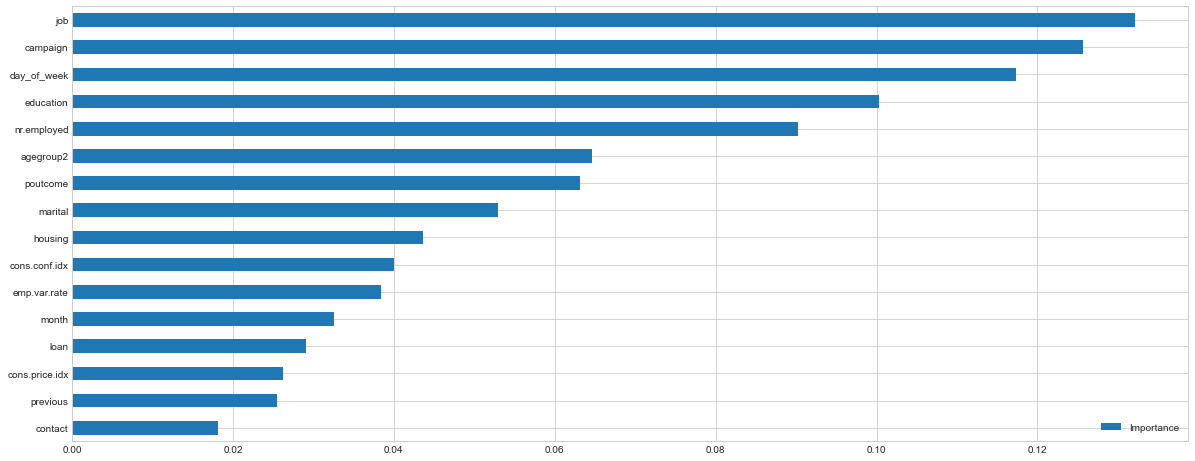

In [390]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_woe,y_train)

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=X_train_woe.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [391]:
X_train_fea = X_train_scale[['job', 'campaign', 'day_of_week', 'education', 'agegroup2',"poutcome","marital"]]
X_test_fea = X_test_scale[['job', 'campaign', 'day_of_week', 'education', 'agegroup2',"poutcome","marital"]]

In [392]:
logi2=LogisticRegression()

logi2.fit(X_train_fea,y_train)
y_train_pred=logi2.predict(X_train_fea)
y_test_pred=logi2.predict(X_test_fea)

In [393]:
print("Train classification report ",classification_report(y_train,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     29238
           1       0.66      0.19      0.29      3712

    accuracy                           0.90     32950
   macro avg       0.78      0.59      0.62     32950
weighted avg       0.88      0.90      0.87     32950

Train accuracy score  0.8977845220030349
Train confusion matrix  [[28884   354]
 [ 3014   698]]


In [394]:
print("Test classification report ",classification_report(y_test,y_test_pred))
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report                precision    recall  f1-score   support

           0       0.90      0.99      0.94      7310
           1       0.63      0.17      0.26       928

    accuracy                           0.90      8238
   macro avg       0.77      0.58      0.60      8238
weighted avg       0.87      0.90      0.87      8238

Test  accuracy score  0.8951201747997086
Test  confusion matrix  [[7219   91]
 [ 773  155]]


In [395]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 5285 to 17673
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             32950 non-null  object 
 1   marital         32950 non-null  object 
 2   education       32950 non-null  object 
 3   housing         32950 non-null  object 
 4   loan            32950 non-null  object 
 5   contact         32950 non-null  object 
 6   month           32950 non-null  object 
 7   day_of_week     32950 non-null  object 
 8   campaign        32950 non-null  float64
 9   previous        32950 non-null  float64
 10  poutcome        32950 non-null  object 
 11  emp.var.rate    32950 non-null  float64
 12  cons.price.idx  32950 non-null  float64
 13  cons.conf.idx   32950 non-null  float64
 14  nr.employed     32950 non-null  float64
 15  agegroup2       32950 non-null  object 
dtypes: float64(6), object(10)
memory usage: 4.3+ MB


# Doing One Hot encoding

In [396]:
# woe_enc = fe_WoEEncoder(variables=["agegroup2","poutcome",'job','marital', 'education', 'housing','loan', 'contact','day_of_week',"month"])

# nominal = ['job','marital','education','contact','month','day_of_week',"agegrpo"]
X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)
X_train

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,"agegroup2_(0, 30]","agegroup2_(30, 45]","agegroup2_(45, 60]","agegroup2_(60, 100]"
5285,-1.047163,-0.398118,0.561633,0.698792,0.912599,0.140583,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1196,0.240316,-0.398118,0.561633,0.698792,0.912599,0.140583,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
33666,0.240316,2.510860,-1.248712,-1.168646,-1.280399,-1.150142,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
29515,1.550420,-0.398118,-1.248712,-0.888689,-1.507488,-1.150142,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
15848,0.240316,-0.398118,0.941006,0.555738,-0.438376,0.987501,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,1.181175,2.515842,-1.218286,1.127763,0.101235,-1.840956,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
28017,0.839753,-0.398118,-1.248712,-0.888689,-1.507488,-1.150142,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
29199,-1.047163,2.510860,-1.248712,-0.888689,-1.507488,-1.150142,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
40061,-1.047163,2.510860,-1.218286,1.127763,0.101235,-1.840956,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [397]:
logi2=LogisticRegression()

logi2.fit(X_train,y_train)
y_train_pred=logi2.predict(X_train)
y_test_pred=logi2.predict(X_test)

In [398]:
print("Train classification report ",classification_report(y_train,y_train_pred),sep="\n\n")
print("Train accuracy score ", accuracy_score(y_train,y_train_pred))
print("Train confusion matrix ", confusion_matrix(y_train,y_train_pred))

Train classification report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29238
           1       0.66      0.24      0.35      3712

    accuracy                           0.90     32950
   macro avg       0.79      0.61      0.65     32950
weighted avg       0.88      0.90      0.88     32950

Train accuracy score  0.9004552352048558
Train confusion matrix  [[28792   446]
 [ 2834   878]]


In [399]:
print("Test classification report ",classification_report(y_test,y_test_pred),sep="\n\n")
print("Test  accuracy score ",accuracy_score(y_test,y_test_pred))
print("Test  confusion matrix ",confusion_matrix(y_test,y_test_pred))

Test classification report 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.61      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238

Test  accuracy score  0.896091284292304
Test  confusion matrix  [[7183  127]
 [ 729  199]]


### One Hot encoding also give similar results to that of WoE encoding

# Conclusions

1.After trying out different methods we understood that encoding using WoE and Powertransformation works best for our model<br>
2.SMOTE was tried, It improved the test F1 Score of minority class a little.<br>
3.But it decreased the train and test precision also the total accuracy of both <br>
4.Class_weight = balanced also give similiar results to SMOTE<br>